### Lesson 2

In [2]:
import pandas as pd
diamond = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv')

In [3]:
diamond.head()

,rownames,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0, 0.5, 'Count')

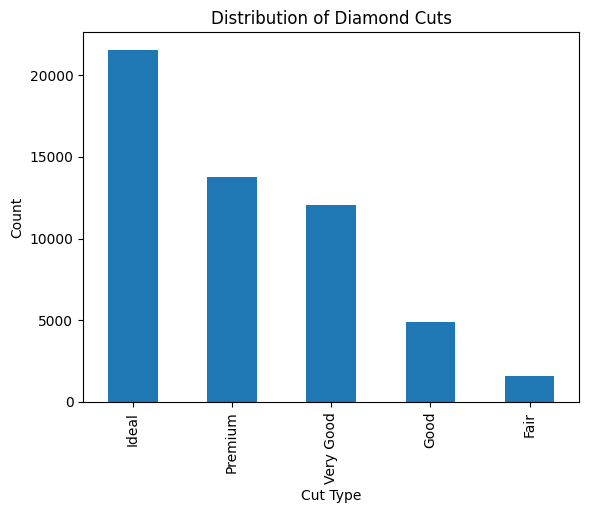

In [4]:
import matplotlib.pyplot as plt

diamond['cut'].value_counts().plot(kind='bar')
plt.title('Distribution of Diamond Cuts')
plt.xlabel('Cut Type')
plt.ylabel('Count')

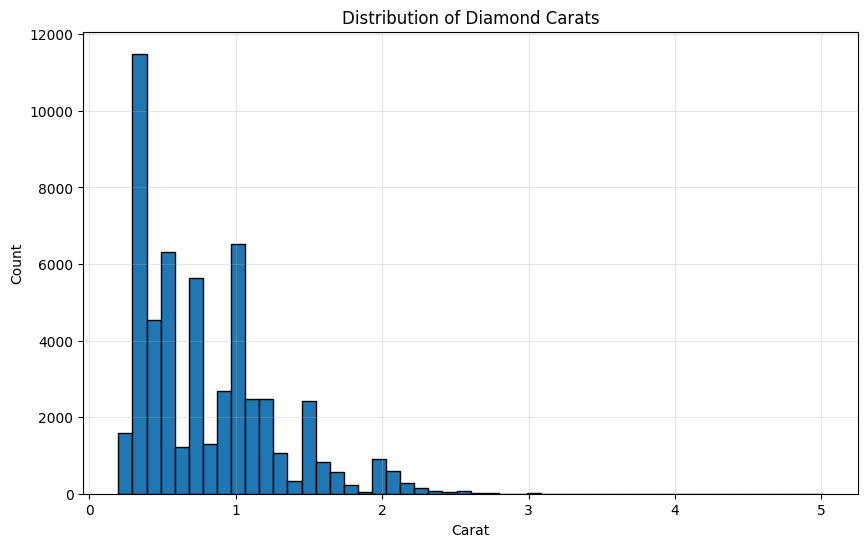

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(diamond['carat'], bins=50, edgecolor='black')
plt.title('Distribution of Diamond Carats')
plt.xlabel('Carat')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

(0.0, 3.0)

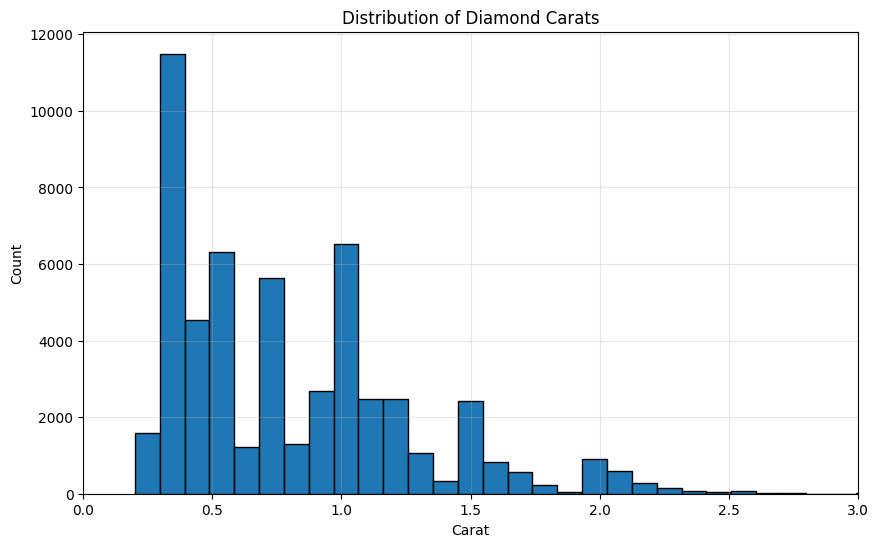

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(diamond['carat'], bins=50, edgecolor='black')
plt.title('Distribution of Diamond Carats')
plt.xlabel('Carat')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.xlim(0, 3)


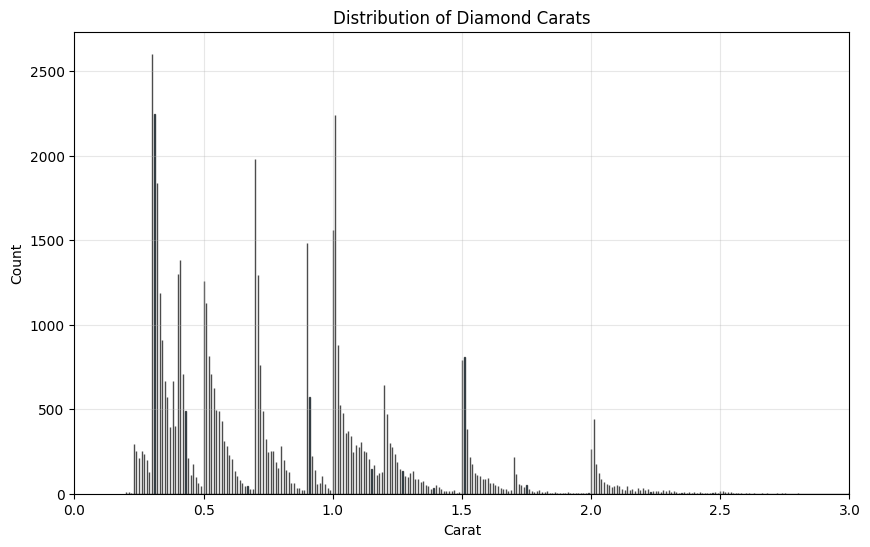

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(diamond['carat'], bins=30000, edgecolor='black', alpha=0.7)
plt.title('Distribution of Diamond Carats')
plt.xlabel('Carat')
plt.ylabel('Count')
plt.xlim(0, 3)
plt.grid(True, alpha=0.3)

# Distribution Pattern Analysis of Diamond Carats

Based on the histogram visualizations:

- Most diamonds cluster between 0.2 and 1.0 carats
- There's a strong peak around 0.3-0.4 carats
- The distribution is right-skewed, with fewer diamonds at higher carat weights
- Very few diamonds exceed 2 carats

This pattern likely exists because:
- Smaller diamonds (0.3-0.4 carats) hit a sweet spot for affordability and market demand
- Larger diamonds are naturally rarer due to geological formation processes
- Price increases exponentially with carat size, limiting market demand for larger stones
- Many diamonds are cut to hit popular weight thresholds (0.5, 0.7, 1.0 carats)

Text(95.72222222222221, 0.5, 'Cut')

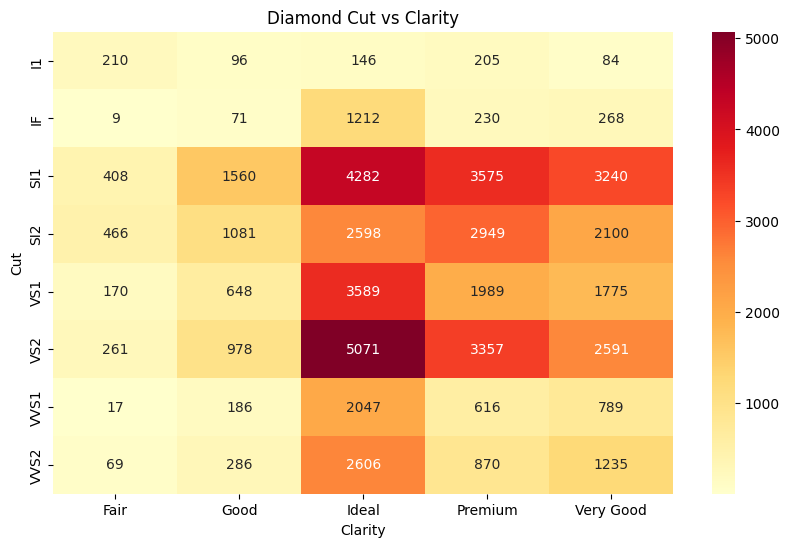

In [14]:
import seaborn as sns

# Create a crosstab of cut and clarity
cross_tab = pd.crosstab(diamond['clarity'], diamond['cut'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Diamond Cut vs Clarity')
plt.xlabel('Clarity')
plt.ylabel('Cut')


# Analysis of Diamond Cut vs Clarity Relationship

- SI1 and SI2 clarity diamonds are the most common across all cut grades
- Ideal cut diamonds are most prevalent, especially in VS2 and SI1 clarity grades
- Fair cut diamonds are the least common across all clarity grades
- High clarity (IF) diamonds are rare, particularly in Fair cut
- There's a noticeable trend where better cuts (Ideal, Very Good) tend to have higher clarity grades
- Lower clarity grades (I1) are more commonly found in Fair and Premium cuts
- The mid-range clarity grades (VS1, VS2) show balanced distribution across Premium and Very Good cuts

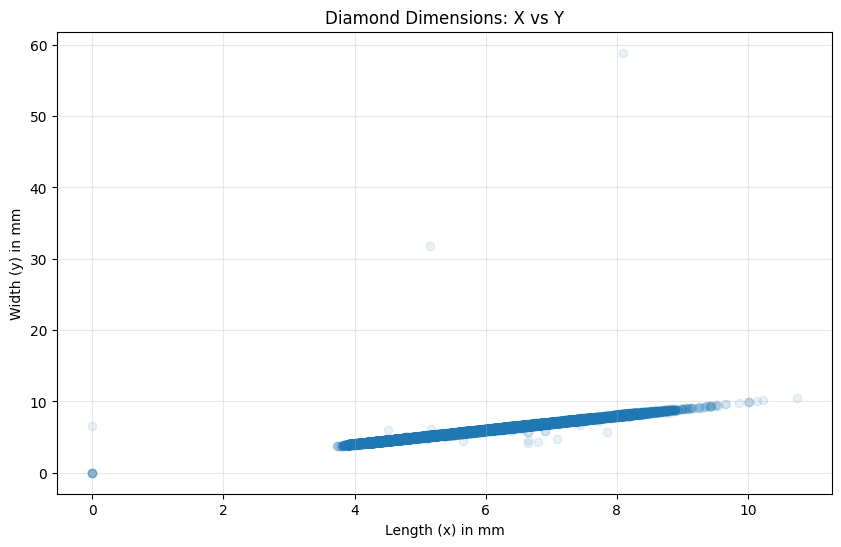

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(diamond['x'], diamond['y'], alpha=0.1)
plt.title('Diamond Dimensions: X vs Y')
plt.xlabel('Length (x) in mm')
plt.ylabel('Width (y) in mm')
plt.grid(True, alpha=0.3)

(3.5, 10.0)

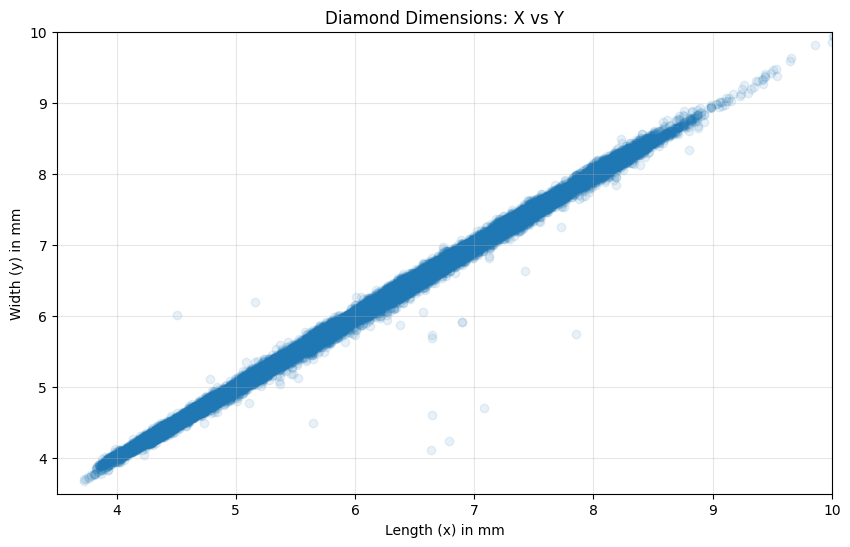

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(diamond['x'], diamond['y'], alpha=0.1)
plt.title('Diamond Dimensions: X vs Y')
plt.xlabel('Length (x) in mm')
plt.ylabel('Width (y) in mm')
plt.grid(True, alpha=0.3)
plt.xlim(3.5, 10)
plt.ylim(3.5, 10)

(3.5, 10.0)

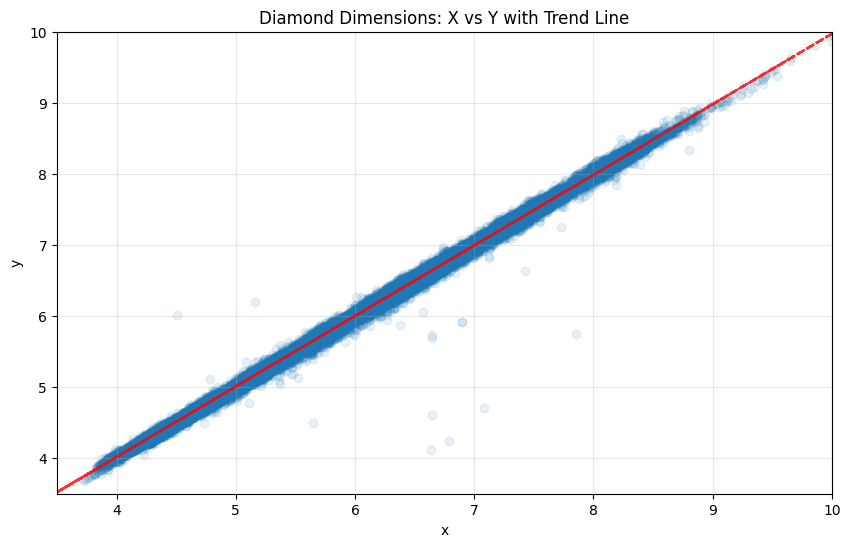

In [18]:
import numpy as np

# Create linear regression line
z = np.polyfit(diamond['x'], diamond['y'], 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
plt.scatter(diamond['x'], diamond['y'], alpha=0.1)
plt.plot(diamond['x'], p(diamond['x']), "r--", alpha=0.8)
plt.title('Diamond Dimensions: X vs Y with Trend Line')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.xlim(3.5, 10)
plt.ylim(3.5, 10)

C:\Users\User\AppData\Local\Temp\ipykernel_92\3360097410.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


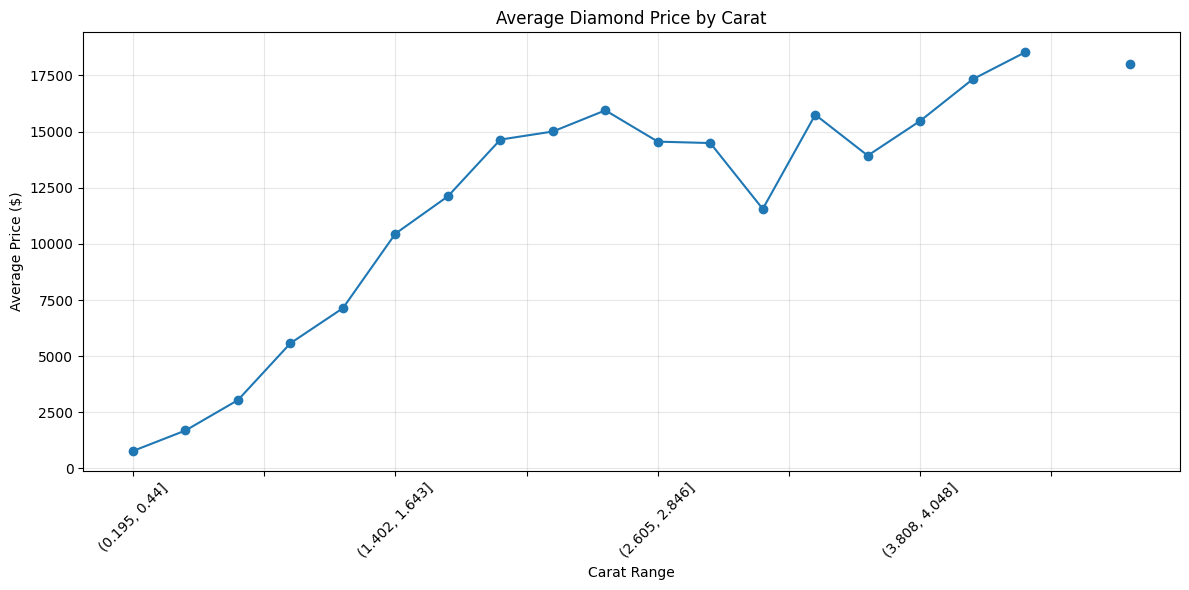

In [19]:
# Create bins for carat sizes and calculate mean price
carat_bins = pd.cut(diamond['carat'], bins=20)
avg_price = diamond.groupby(carat_bins)['price'].mean()

plt.figure(figsize=(12, 6))
avg_price.plot(kind='line', marker='o')
plt.title('Average Diamond Price by Carat')
plt.xlabel('Carat Range')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

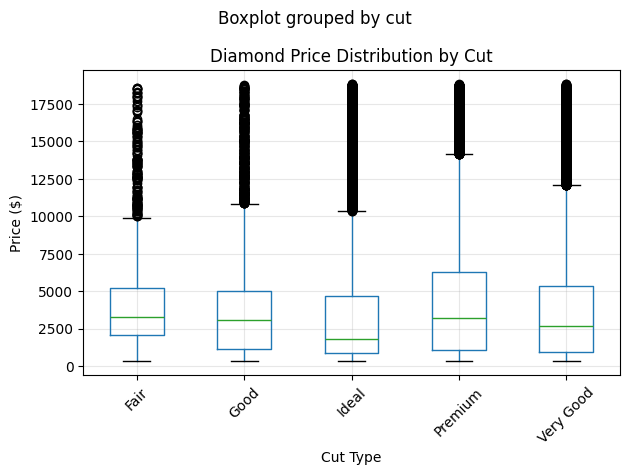

In [20]:
plt.figure(figsize=(12, 6))
diamond.boxplot(column='price', by='cut')
plt.title('Diamond Price Distribution by Cut')
plt.xlabel('Cut Type') 
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()


# Analysis of Diamond Price vs Cut Quality

Based on the boxplot visualization, the relationship between cut quality and price shows an unexpected pattern:

1. Fair cut (lowest quality) has a lower median price, as expected
2. However, the progression from Good to Ideal doesn't show a clear price premium:
    - Premium and Very Good cuts actually show slightly higher median prices than Ideal
    - Ideal cut diamonds don't command the highest median prices despite being the highest quality

This counter-intuitive pattern likely occurs because:
- Cut is just one of several factors affecting diamond price
- Carat weight and clarity often have stronger influence on price than cut quality
- Higher quality cuts may be more common in smaller carat sizes, lowering their median price
- The relationship between cut and price is confounded by other variables

So while cut quality is important for a diamond's brilliance and value, the data suggests it's not the dominant factor in determining price.


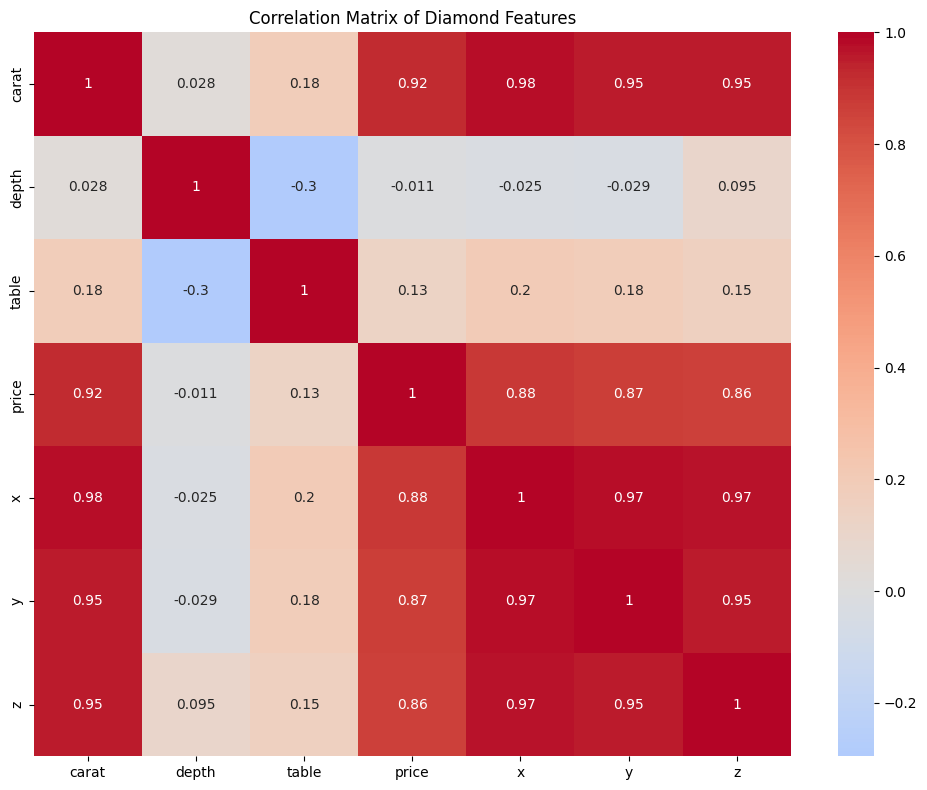

In [21]:
import seaborn as sns

# Select numeric columns for correlation
numeric_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
correlation_matrix = diamond[numeric_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Diamond Features')
plt.tight_layout()

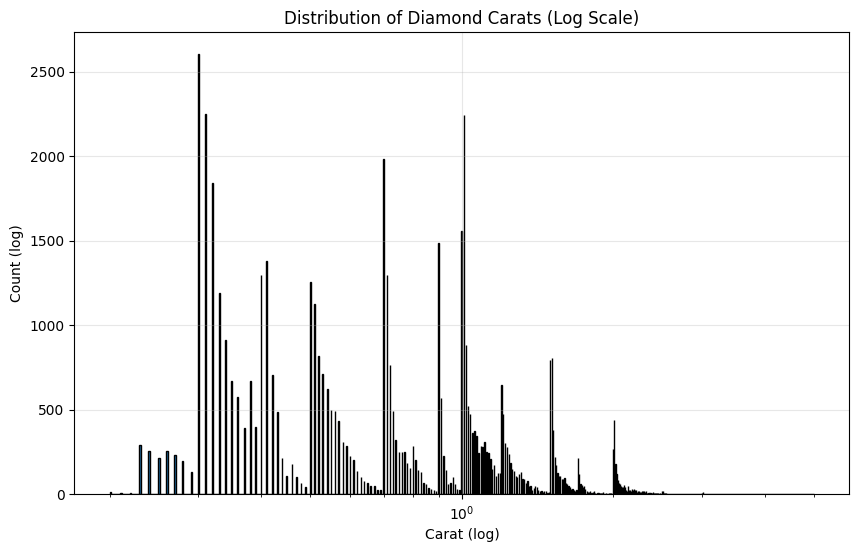

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(diamond['carat'], bins=3000, edgecolor='black')
plt.xscale('log') 
plt.title('Distribution of Diamond Carats (Log Scale)')
plt.xlabel('Carat (log)')
plt.ylabel('Count (log)')
plt.grid(True, alpha=0.3)

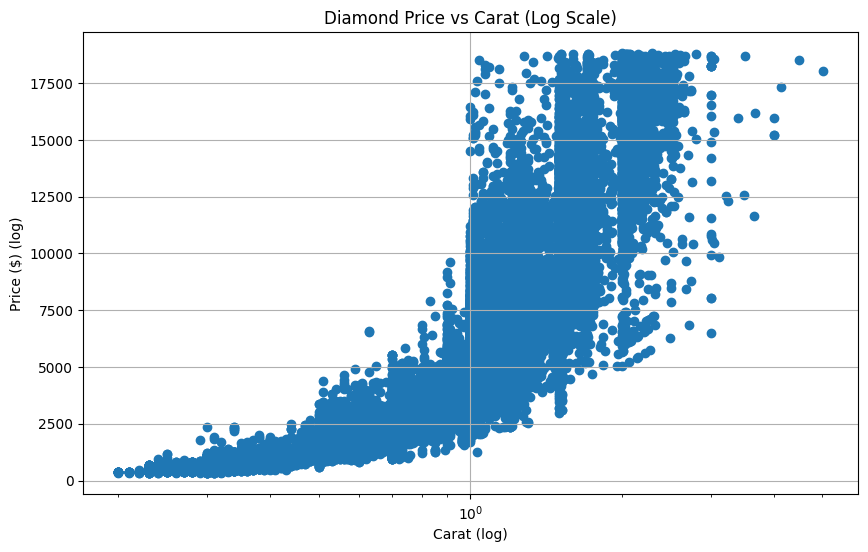

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(diamond['carat'], diamond['price'])
plt.xscale('log')
plt.title('Diamond Price vs Carat (Log Scale)')
plt.xlabel('Carat (log)')
plt.ylabel('Price ($) (log)')
plt.grid(True)

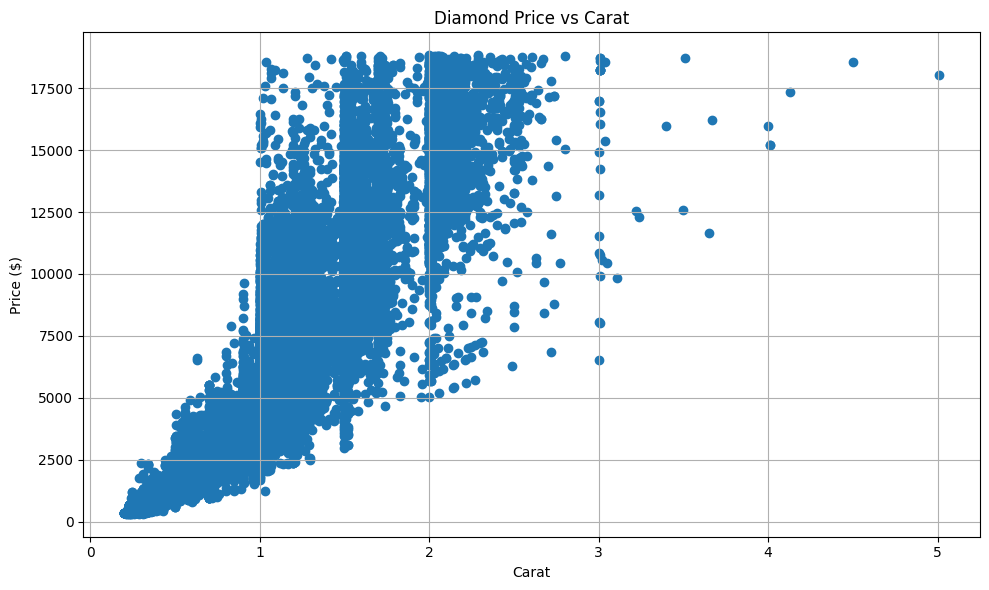

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(diamond['carat'], diamond['price'])
plt.title('Diamond Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()

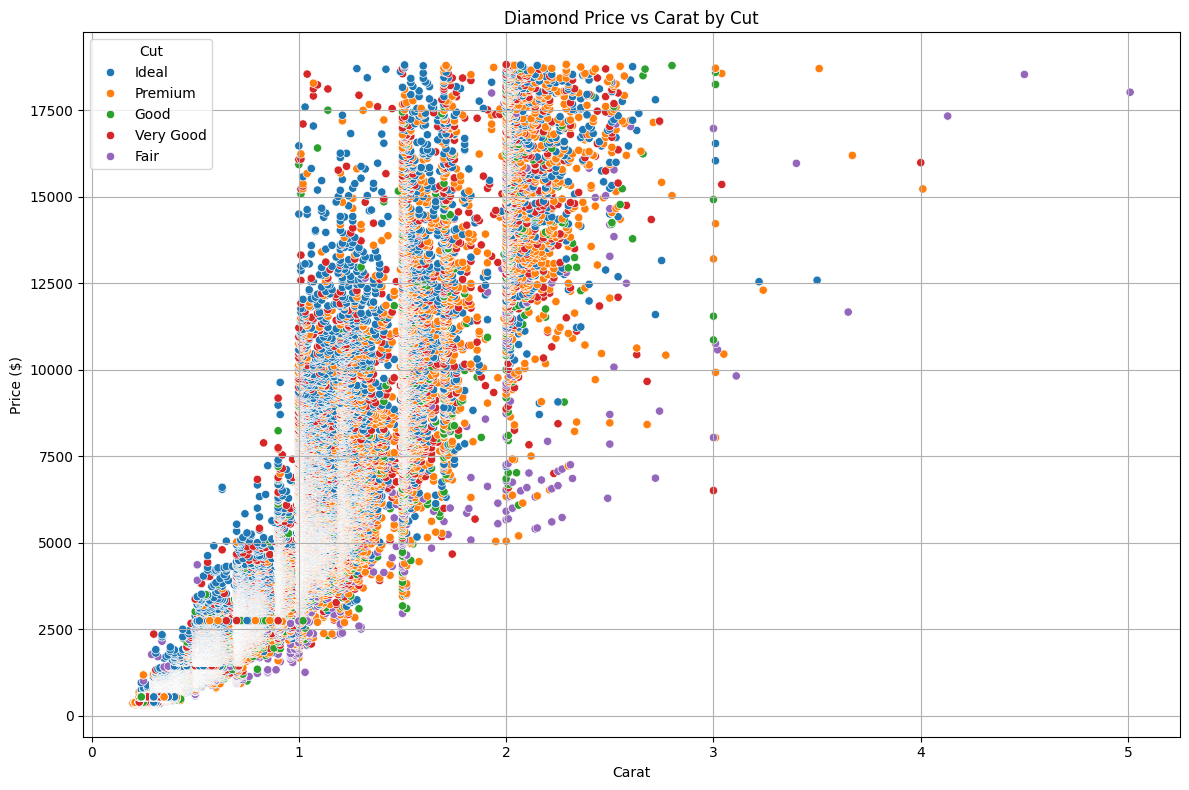

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=diamond, x='carat', y='price', hue='cut')
plt.title('Diamond Price vs Carat by Cut')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.legend(title='Cut')
plt.grid(True)
plt.tight_layout()


# Relationship Between Carat and Cut: Understanding the Price Paradox

Based on the scatter plot showing diamond price vs carat by cut, several key insights emerge:

1. Price-Carat Distribution by Cut:
    - All cut grades follow a generally similar exponential price increase with carat size
    - There's significant overlap between different cut grades at all carat sizes
    - Price variation increases substantially at higher carat weights

2. Explaining the Price Paradox:
    - The earlier boxplot showed Premium/Very Good cuts having higher median prices than Ideal cuts
    - The scatter plot reveals this is because cut quality is secondary to carat weight in determining price
    - Ideal cuts are more common in smaller carat sizes (as shown in the heatmap)
    - Many larger diamonds have Premium or Very Good cuts, driving up their median prices

3. Key Conclusions:
    - Carat weight is the dominant price driver, overwhelming the impact of cut quality
    - Cut quality's price premium is most visible when comparing diamonds of identical carat weight
    - The market appears to prioritize size over cut perfection, especially in larger stones
    - The "paradox" of Premium cuts costing more than Ideal is explained by their size distribution, not inherent value


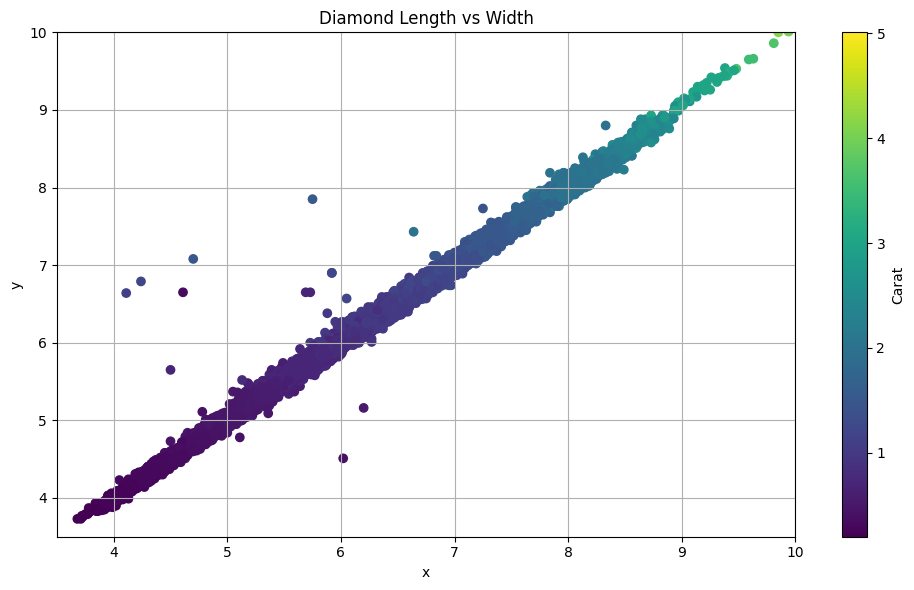

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(diamond['y'], diamond['x'], c=diamond['carat'], cmap='viridis')
plt.colorbar(label='Carat')
plt.title('Diamond Length vs Width')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.xlim(3.5, 10)
plt.ylim(3.5, 10)
plt.tight_layout()


# Diamond Length vs Width Analysis

## Strong Positive Correlation
The visualization reveals a clear linear relationship between diamond length (x) and width (y), demonstrating:

- Near-perfect correlation between dimensions
- Proportional scaling as size increases 
- Most diamonds following standard cutting ratios

## Size Distribution
The color gradient by carat weight shows:

- Smaller diamonds (lighter colors) cluster in the 3.5-6mm range
- Larger diamonds (darker colors) spread toward 8-10mm
- Gradual transition in carat weight as dimensions increase

## Cutting Consistency 
The tight clustering along the diagonal indicates:

- Highly standardized cutting practices
- Strong adherence to ideal proportion guidelines
- Few outliers from the expected length-width ratio


#### Lesson 3 

In [37]:
diamond[diamond['price'] >= 10000].head(n = 10)

,rownames,carat,cut,color,clarity,depth,table,price,x,y,z
21927,21928,1.51,Good,H,VS2,64.0,59.0,10000,7.25,7.19,4.62
21928,21929,1.70,Ideal,J,VS2,60.5,58.0,10002,7.73,7.74,4.68
21929,21930,1.03,Ideal,E,VVS2,60.6,59.0,10003,6.50,6.53,3.95
21930,21931,1.23,Very Good,G,VVS2,60.6,55.0,10004,6.93,7.02,4.23
21931,21932,1.25,Ideal,F,VS2,61.6,55.0,10006,6.93,6.96,4.28
21932,21933,2.01,Very Good,I,SI2,61.4,63.0,10009,8.19,7.96,4.96
21933,21934,1.21,Very Good,F,VS1,62.3,58.0,10009,6.76,6.85,4.24
21934,21935,1.51,Premium,I,VS2,59.9,60.0,10010,7.42,7.36,4.43
21935,21936,1.01,Fair,D,SI2,64.6,58.0,10011,6.25,6.20,4.02
21936,21937,1.05,Ideal,F,VVS2,60.5,55.0,10011,6.67,6.58,4.01


In [41]:
diamond[(diamond['price'] >= 10000) & ((diamond['clarity'] == 'VVS1') | (diamond['clarity'] == 'IF'))].head(n = 10)

,rownames,carat,cut,color,clarity,depth,table,price,x,y,z
21946,21947,1.01,Very Good,F,VVS1,62.9,57.0,10019,6.35,6.41,4.01
21959,21960,1.02,Very Good,E,IF,61.7,60.0,10029,6.38,6.52,3.98
21961,21962,1.03,Very Good,F,IF,62.8,57.0,10032,6.40,6.47,4.04
21978,21979,1.00,Very Good,F,IF,63.2,63.0,10046,6.26,6.24,3.95
21986,21987,1.11,Ideal,G,IF,61.2,54.0,10053,6.71,6.73,4.11
21991,21992,1.00,Ideal,F,VVS1,62.3,53.0,10058,6.37,6.43,3.99
21998,21999,1.09,Premium,G,IF,61.3,58.0,10065,6.64,6.60,4.06
21999,22000,1.11,Very Good,F,VVS1,62.5,59.0,10069,6.59,6.63,4.13
22052,22053,1.16,Ideal,G,IF,62.3,55.0,10082,6.79,6.73,4.21
22053,22054,1.16,Ideal,G,IF,62.0,57.0,10082,6.73,6.70,4.16


In [43]:
diamond[['carat', 'cut', 'color', 'clarity']].head(n = 10)

,carat,cut,color,clarity
0,0.23,Ideal,E,SI2
1,0.21,Premium,E,SI1
2,0.23,Good,E,VS1
3,0.29,Premium,I,VS2
4,0.31,Good,J,SI2
5,0.24,Very Good,J,VVS2
6,0.24,Very Good,I,VVS1
7,0.26,Very Good,H,SI1
8,0.22,Fair,E,VS2
9,0.23,Very Good,H,VS1


In [44]:
diamond.sort_values(by='carat', ascending=False).head(n = 10)

,rownames,carat,cut,color,clarity,depth,table,price,x,y,z
27415,27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27130,27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
25999,26000,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
26444,26445,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26534,26535,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
23644,23645,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
27679,27680,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03
24328,24329,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03


In [45]:
diamond['price_per_carat'] = diamond['price'] / diamond['carat']
diamond.head(n = 10)

,rownames,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,1400.000000
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,1400.000000
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,1296.153846
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,1531.818182
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,1469.565217


In [46]:
diamond['fancy_diamond'] = diamond['price_per_carat'].apply(lambda x: True if x > 10000 else False)
diamond.head(n = 10)

,rownames,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,fancy_diamond
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304,False
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952,False
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130,False
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138,False
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161,False
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,1400.000000,False
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,1400.000000,False
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,1296.153846,False
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,1531.818182,False
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,1469.565217,False


In [48]:
diamond['good_value'] = np.where(diamond['carat'] > 2, diamond['price'] < 5000, diamond['price'] < 5000)
diamond.head(n = 10)

,rownames,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,fancy_diamond,good_value
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304,False,True
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952,False,True
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130,False,True
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138,False,True
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161,False,True
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,1400.000000,False,True
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,1400.000000,False,True
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,1296.153846,False,True
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,1531.818182,False,True
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,1469.565217,False,True


In [49]:
conditions = [
    (diamond['carat'] > 2) & (diamond['price'] < 5000),
    (diamond['price'] < 5000)
]
values = ['good', 'ok']

diamond['value'] = np.select(conditions, values, default='bad')
diamond.head(n = 10)

,rownames,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,fancy_diamond,good_value,value
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304,False,True,ok
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952,False,True,ok
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130,False,True,ok
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138,False,True,ok
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161,False,True,ok
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,1400.000000,False,True,ok
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,1400.000000,False,True,ok
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,1296.153846,False,True,ok
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,1531.818182,False,True,ok
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,1469.565217,False,True,ok


In [51]:
diamond[diamond['price']/diamond['carat'] > 10000].count()

rownames           617
carat              617
cut                617
color              617
clarity            617
depth              617
table              617
price              617
x                  617
y                  617
z                  617
price_per_carat    617
fancy_diamond      617
good_value         617
value              617
dtype: int64

In [55]:
fancy_diamonds_condition = diamond['price'] / diamond['carat'] > 10000

# Summarize the data
summary = pd.DataFrame({
    'num_fancy_diamonds': [fancy_diamonds_condition.sum()],
    'mean_diamond_price': [diamond['price'].mean()]
})

print(summary)

   num_fancy_diamonds  mean_diamond_price
0                 617         3932.799722


In [56]:
# Filter, mutate, and arrange the data
result = (diamond[diamond['cut'] == 'Premium']
          .assign(price_per_carat=lambda x: x['price'] / x['carat'])
          .sort_values(by='price_per_carat', ascending=False))

print(result.head())



       rownames  carat      cut color clarity  depth  table  price     x  \
27530     27531   1.07  Premium     D      IF   60.9   58.0  18279  6.67   
26549     26550   1.01  Premium     D      IF   61.6   56.0  16234  6.46   
26105     26106   1.02  Premium     D      IF   61.5   60.0  15370  6.52   
26237     26238   1.04  Premium     D      IF   60.6   56.0  15671  6.60   
26003     26004   1.02  Premium     D      IF   61.5   60.0  15231  6.45   

          y     z  price_per_carat  fancy_diamond  good_value value  
27530  6.57  4.03     17083.177570           True       False   bad  
26549  6.43  3.97     16073.267327           True       False   bad  
26105  6.45  3.99     15068.627451           True       False   bad  
26237  6.54  3.98     15068.269231           True       False   bad  
26003  6.52  3.99     14932.352941           True       False   bad  


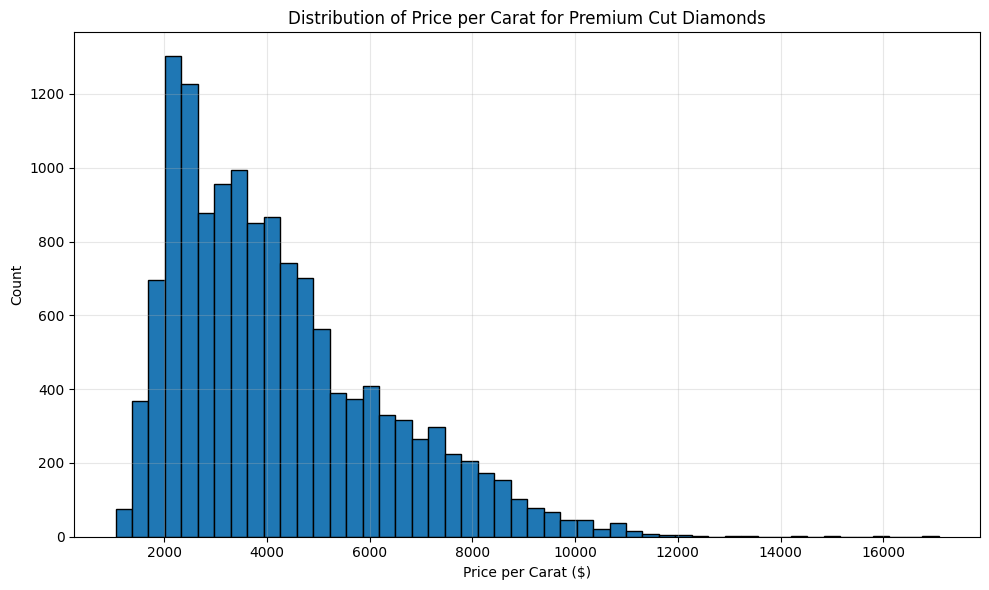

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(result['price_per_carat'], bins=50, edgecolor='black')
plt.title('Distribution of Price per Carat for Premium Cut Diamonds')
plt.xlabel('Price per Carat ($)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [61]:
print(f'the minimum price of diamond is : {diamond['price'].min()}')

the minimum price of diamond is : 326


In [64]:
print(f'The number of diamond with a lenght of 1.5 of their width is : {diamond[diamond['x'] > 1.5 * diamond['y']].shape[0]}')

The number of diamond with a lenght of 1.5 of their width is : 3


In [65]:
color_filter = diamond['color'].isin(['D', 'E', 'F', 'G'])
median_carats = (diamond[color_filter]
                .groupby('cut')['carat']
                .median()
                .round(3)
                .sort_values(ascending=False))

print("Median carats by cut for colors D, E, F, G:")
print(median_carats)

Median carats by cut for colors D, E, F, G:
cut
Fair         0.91
Good         0.72
Premium      0.71
Very Good    0.70
Ideal        0.52
Name: carat, dtype: float64
